In [1]:
#IMPORTANDO LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [78]:
df = pd.read_csv("df_definitivo.csv", index_col=0)
df.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,generation
0,53,No,NaN,2015.722222,research & development,6,3,NaN,1,1,Male,3,5,research director,3,NaN,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,5,3.0,20,15.0,15,15,1972,195370.0,True,Gen X


# Contexto

### Generación y Genero

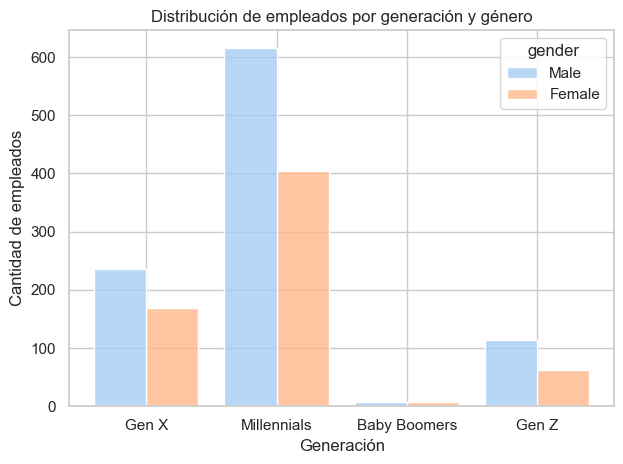

In [62]:

# Histograma con hue por género
sns.histplot(data=df, x='generation', hue='gender', multiple='dodge', shrink=0.8, palette='pastel')
plt.title('Distribución de empleados por generación y género')
plt.xlabel('Generación')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=0)
plt.tight_layout()


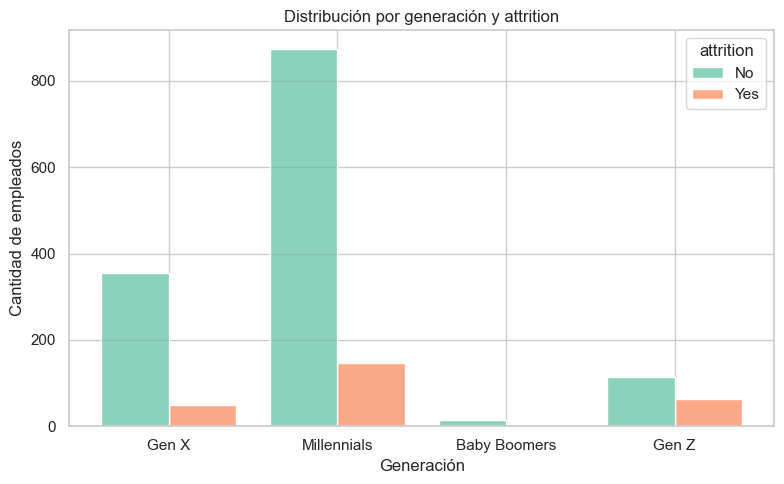

In [79]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='generation', hue='attrition', multiple='dodge', shrink=0.8, palette='Set2')

plt.title('Distribución por generación y attrition')
plt.xlabel('Generación')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


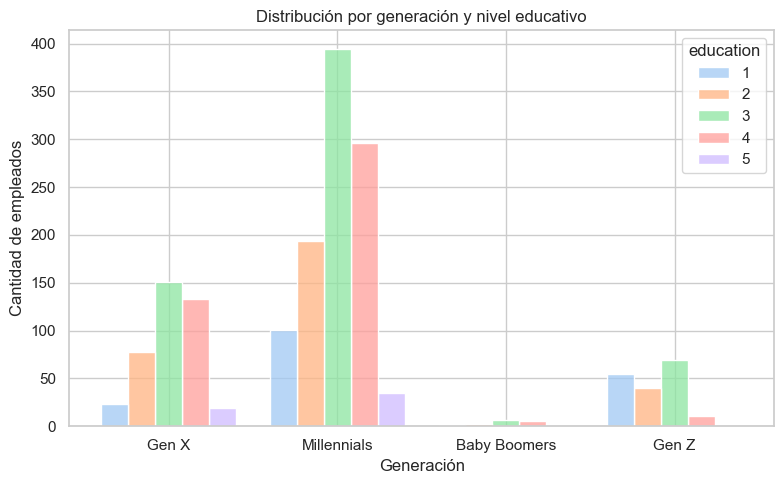

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='generation', hue='education', multiple='dodge', shrink=0.8, palette='pastel')

plt.title('Distribución por generación y nivel educativo')
plt.xlabel('Generación')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# No hay BB Research Director y Sales Representative los Baby Boomers 
# No hay Gen Z en Research Director
df.groupby(['jobrole', 'generation']).size().reset_index()

,jobrole,generation,0
0,healthcare representative,Baby Boomers,1
1,healthcare representative,Gen X,51
2,healthcare representative,Gen Z,3
3,healthcare representative,Millennials,94
4,human resources,Baby Boomers,1
5,human resources,Gen X,12
6,human resources,Gen Z,8
7,human resources,Millennials,36
8,laboratory technician,Baby Boomers,1
9,laboratory technician,Gen X,45


# Generación 

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/2914530582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="pastel")


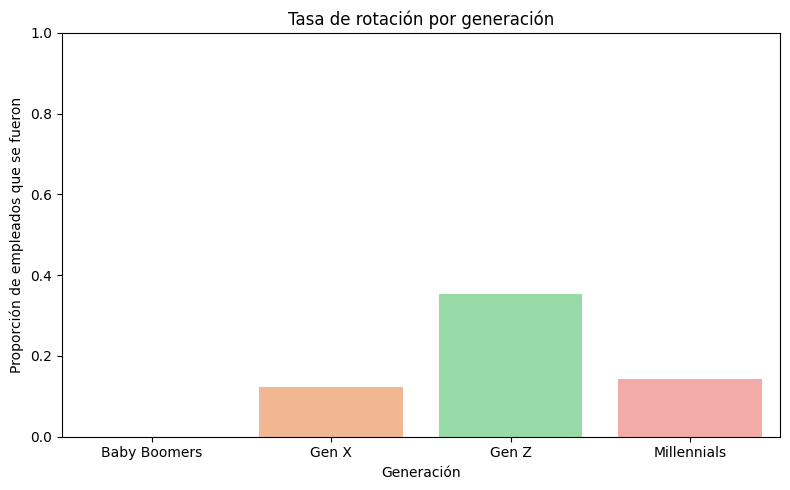

In [8]:
# Cuántos empleados dejaron la empresa ("Yes") por generación
# DataFrame con proporciones de attrition = Yes por generación
attrition_rate = df[df['attrition'] == 'Yes'].groupby('generation').size() / df.groupby('generation').size()

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="pastel")
plt.ylabel("Proporción de empleados que se fueron")
plt.xlabel("Generación")
plt.title("Tasa de rotación por generación")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1536175429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="pastel")


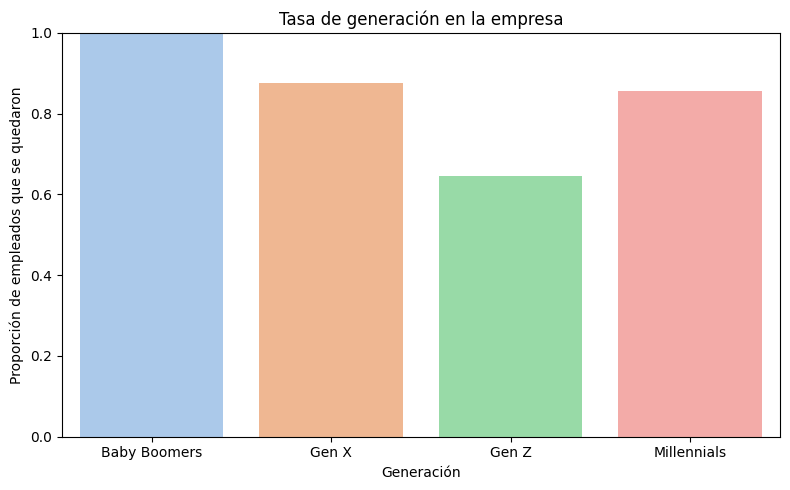

In [9]:

# DataFrame con proporciones de attrition = No por generación
attrition_rate = df[df['attrition'] == 'No'].groupby('generation').size() / df.groupby('generation').size()

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="pastel")
plt.ylabel("Proporción de empleados que se quedaron")
plt.xlabel("Generación")
plt.title("Tasa de generación en la empresa")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Educacación 

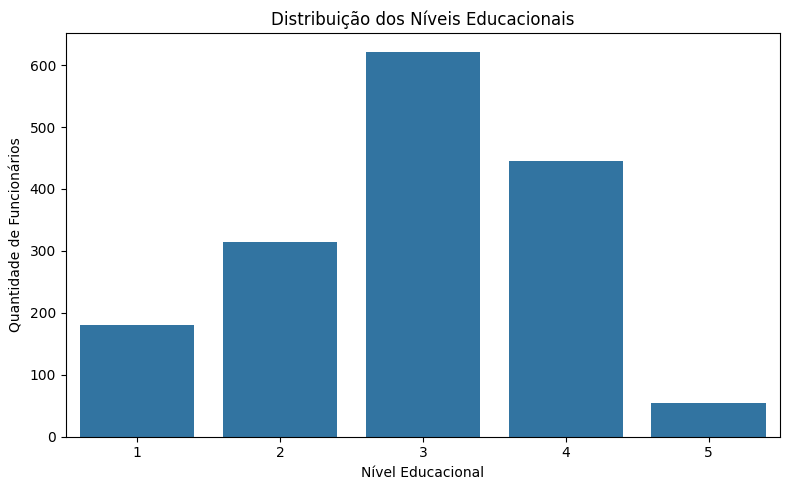

In [4]:
educ_counts = df['education'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=educ_counts.index, y=educ_counts.values)
plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade de Funcionários')
plt.title('Distribuição dos Níveis Educacionais')
plt.tight_layout()
plt.show()

## Departamiento 

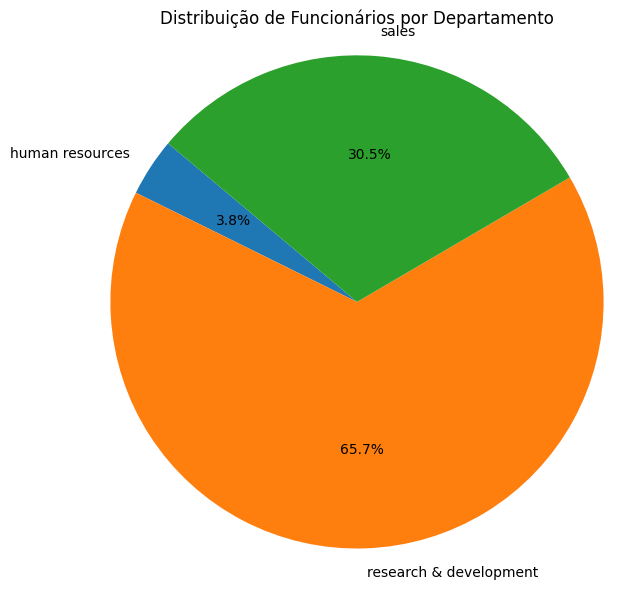

In [5]:
# Departamento - groupby e gráfico de pizza
dept_counts = df.groupby('department').size()
plt.figure(figsize=(7, 7))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Funcionários por Departamento')
plt.axis('equal')
plt.show()

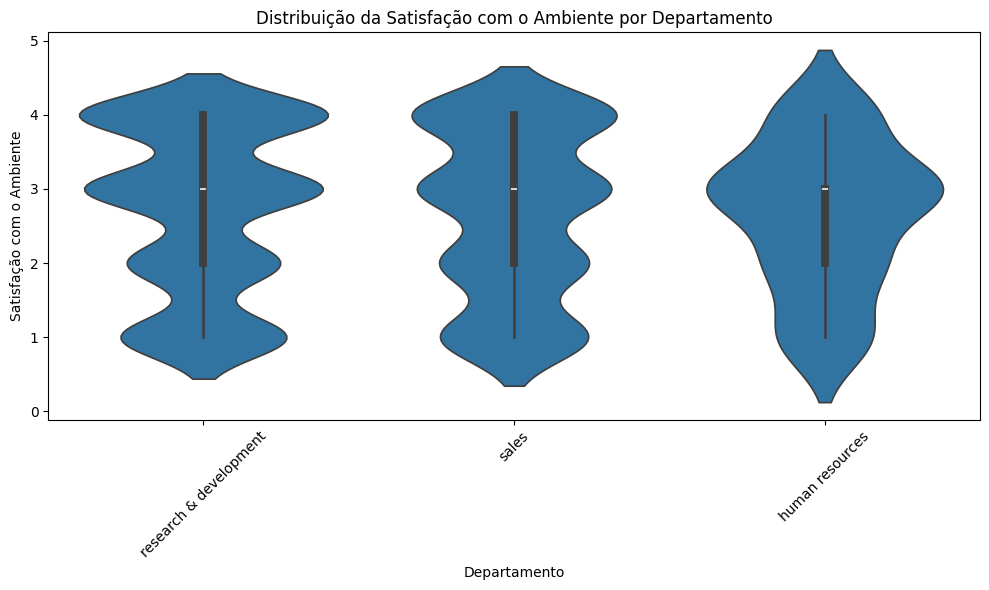

In [7]:
# Satisfação no ambiente de trabalho por departamento
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='department', y='environmentsatisfaction', inner='box')
plt.xticks(rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Satisfação com o Ambiente')
plt.title('Distribuição da Satisfação com o Ambiente por Departamento')
plt.tight_layout()
plt.show()

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/2841179854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='department', y='environmentsatisfaction', palette="pastel")


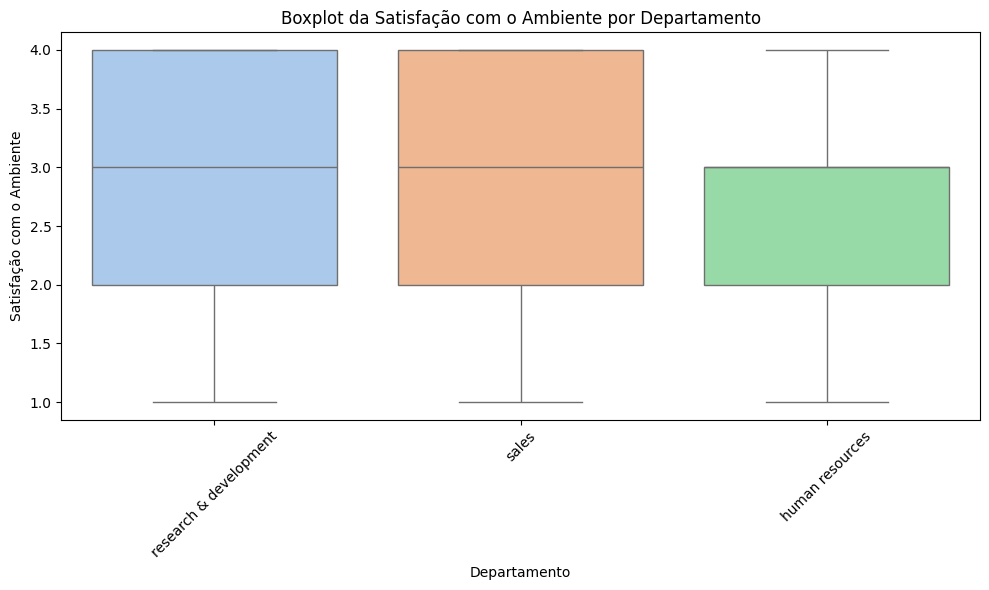

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='department', y='environmentsatisfaction', palette="pastel")
plt.xticks(rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Satisfação com o Ambiente')
plt.title('Boxplot da Satisfação com o Ambiente por Departamento')
plt.tight_layout()
plt.show()


## Overtime

In [14]:
# Excluir valores "unknown" antes de calcular
percentuais_overtime_filtrado = df[df['overtime'] != 'unknown']['overtime'].value_counts(normalize=True) * 100

# Mostrar com 2 casas decimais
print(percentuais_overtime_filtrado.round(2))


overtime
No         42.26
Unknown    41.88
Yes        15.86
Name: proportion, dtype: float64


/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/4277657484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado, x='overtime', palette='pastel')


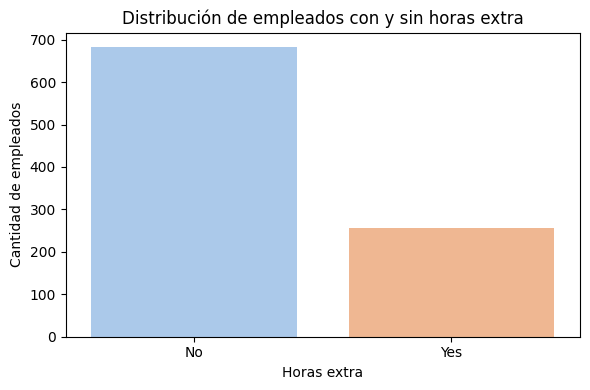

In [18]:
# Filtrar registros com valores válidos em 'overtime'
df_filtrado = df[df['overtime'] != 'Unknown']

# Gráfico: Distribución de empleados con y sin horas extra
plt.figure(figsize=(6, 4))
sns.countplot(data=df_filtrado, x='overtime', palette='pastel')
plt.title('Distribución de empleados con y sin horas extra')
plt.xlabel('Horas extra')
plt.ylabel('Cantidad de empleados')
plt.tight_layout()
plt.show()



/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/3140861154.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado[df_filtrado['attrition'] == 'No'],
/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/3140861154.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado[df_filtrado['attrition'] == 'Yes'],


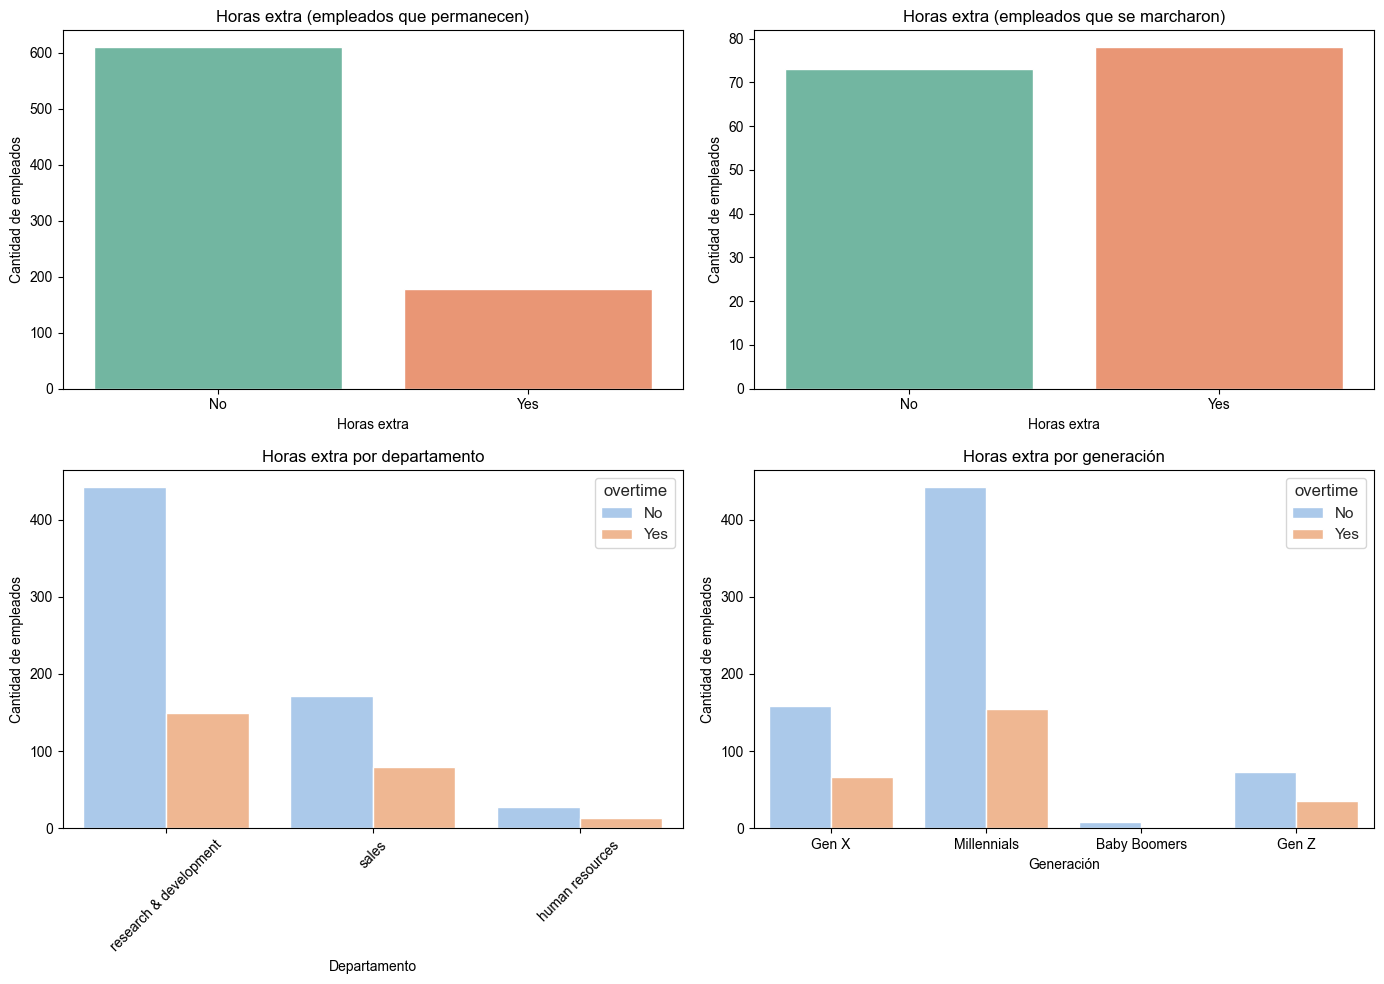

In [21]:
# Filtrar registros válidos (sin "Unknown")
df_filtrado = df[df['overtime'] != 'Unknown']

# Crear una figura con 4 subgráficos (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
sns.set(style="whitegrid")

# Empleados que NO dejaron la empresa (attrition = No)
sns.countplot(data=df_filtrado[df_filtrado['attrition'] == 'No'],
              x='overtime', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Horas extra (empleados que permanecen)')
axes[0, 0].set_xlabel('Horas extra')
axes[0, 0].set_ylabel('Cantidad de empleados')

# Empleados que SÍ dejaron la empresa (attrition = Yes)
sns.countplot(data=df_filtrado[df_filtrado['attrition'] == 'Yes'],
              x='overtime', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Horas extra (empleados que se marcharon)')
axes[0, 1].set_xlabel('Horas extra')
axes[0, 1].set_ylabel('Cantidad de empleados')

# Horas extra por departamento
sns.countplot(data=df_filtrado, x='department', hue='overtime',
              ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Horas extra por departamento')
axes[1, 0].set_xlabel('Departamento')
axes[1, 0].set_ylabel('Cantidad de empleados')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4Horas extra por generación
sns.countplot(data=df_filtrado, x='generation', hue='overtime',
              ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Horas extra por generación')
axes[1, 1].set_xlabel('Generación')
axes[1, 1].set_ylabel('Cantidad de empleados')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [22]:
# Filtrar registros válidos (sem "Unknown" em overtime)
df_filtrado = df[df['overtime'] != 'Unknown']

# Agrupar por 'attrition' e calcular a % de 'overtime' = 'Yes'
porcentagem_overtime_por_attrition = (
    df_filtrado[df_filtrado['overtime'] == 'Yes']
    .groupby('attrition')
    .size()
    / df_filtrado.groupby('attrition').size()
) * 100

# Exibir resultado arredondado
print(porcentagem_overtime_por_attrition.round(2))


attrition
No     22.62
Yes    51.66
dtype: float64


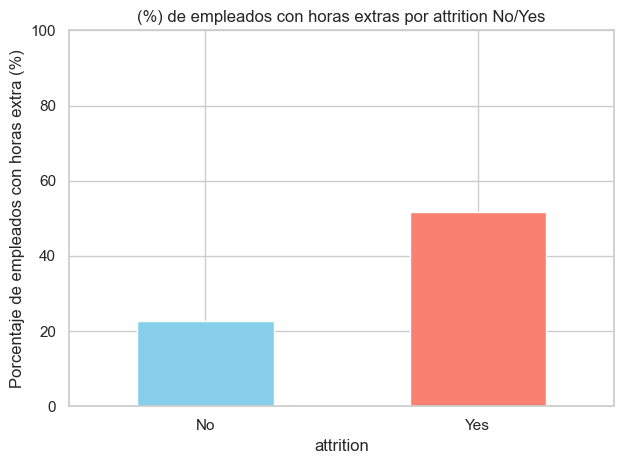

In [28]:

# Gráfico de barras das porcentagens
porcentagem_overtime_por_attrition.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('(%) de empleados con horas extras por attrition No/Yes')
plt.ylabel('Porcentaje de empleados con horas extra (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1172786091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['is_overtime_yes'] = df_filtrado['overtime'] == 'Yes'
/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1172786091.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtrado, x='attrition', y='is_overtime_yes', ci=None, palette='pastel')
/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1172786091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtr

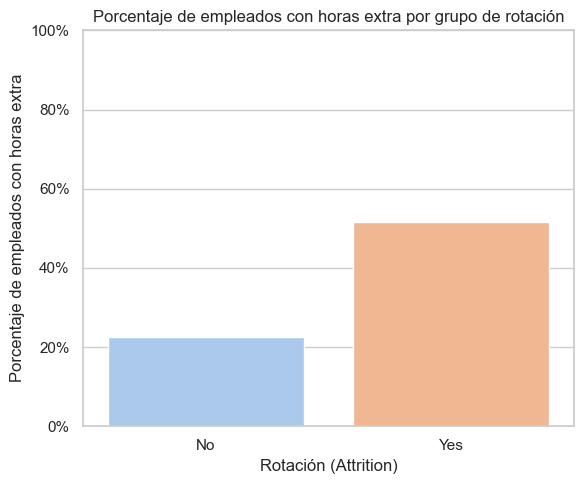

In [33]:
# Filtrar registros válidos
df_filtrado = df[df['overtime'] != 'Unknown']

# Criar uma coluna booleana: True se overtime == 'Yes'
df_filtrado['is_overtime_yes'] = df_filtrado['overtime'] == 'Yes'

# Gráfico de barras com seaborn
plt.figure(figsize=(6, 5))
sns.barplot(data=df_filtrado, x='attrition', y='is_overtime_yes', ci=None, palette='pastel')

# Ajustes
plt.title('Porcentaje de empleados con horas extra por grupo de rotación')
plt.xlabel('Rotación (Attrition)')
plt.ylabel('Porcentaje de empleados con horas extra')
plt.ylim(0, 1)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()


In [30]:
# Filtrar apenas os funcionários que saíram e faziam horas extra
filtro = (df['attrition'] == 'Yes') & (df['overtime'] == 'Yes')
df_filtrados = df[filtro]

# Contar por departamento
departamentos = df_filtrados['department'].value_counts()

# Mostrar resultado
print(departamentos)


department
research & development    41
sales                     31
human resources            4
Name: count, dtype: int64


In [31]:
# Porcentagem por departamento
porcentagem = (departamentos / departamentos.sum()) * 100
print(porcentagem.round(2))


department
research & development    53.95
sales                     40.79
human resources            5.26
Name: count, dtype: float64


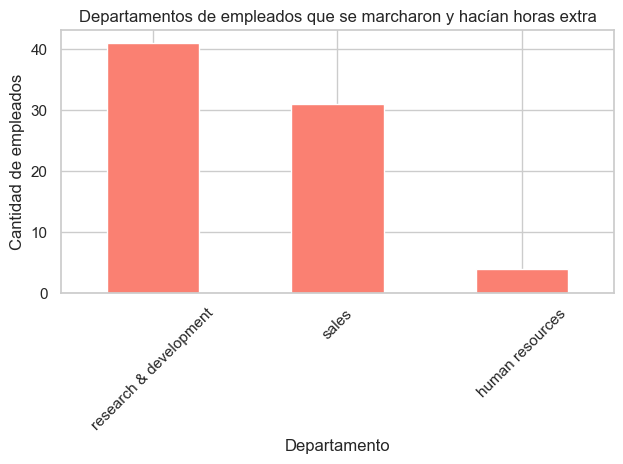

In [32]:
# Gráfico
departamentos.plot(kind='bar', color='salmon')
plt.title('Departamentos de empleados que se marcharon y hacían horas extra')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Overtime por Departamiento

In [34]:
# Filtrar empleados que hacen horas extra y NO han dejado la empresa
filtro = (df['overtime'] == 'Yes') & (df['attrition'] == 'No')
df_filtrados = df[filtro]

# Contar por departamento
departamentos = df_filtrados['department'].value_counts()

# Mostrar resultado
print(departamentos)


department
research & development    108
sales                      49
human resources            10
Name: count, dtype: int64


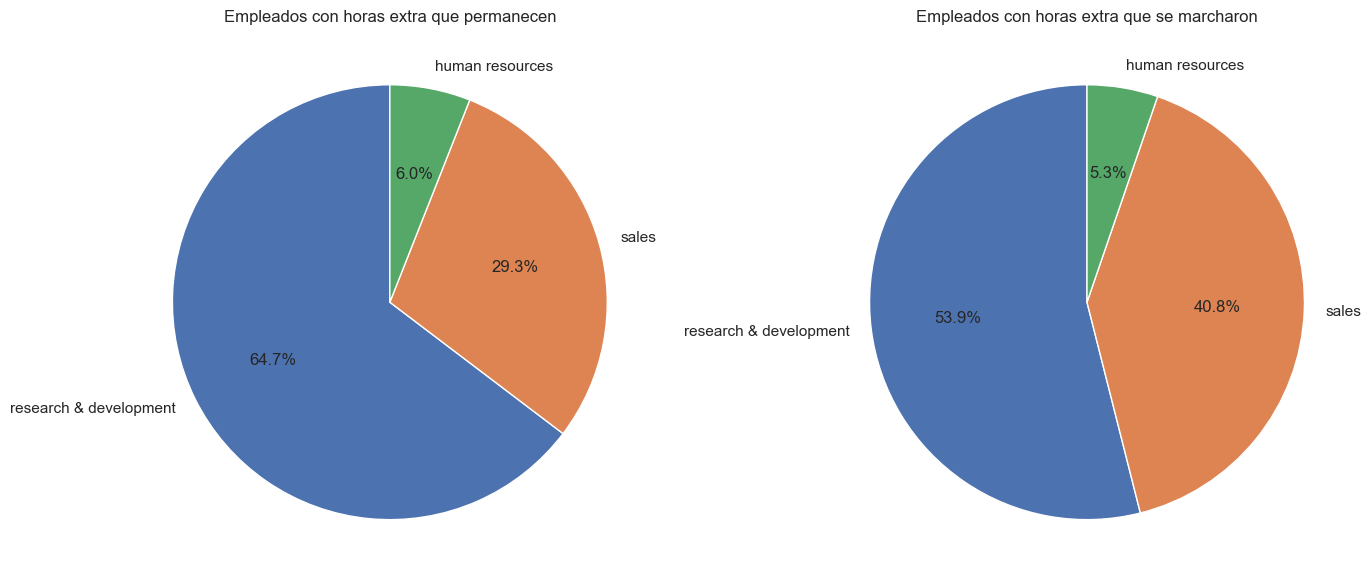

In [38]:
# Filtrar empleados que hacen horas extra y permanecen
filtro_no = (df['overtime'] == 'Yes') & (df['attrition'] == 'No')
departamentos_no = df[filtro_no]['department'].value_counts(normalize=True) * 100

# Filtrar empleados que hacen horas extra y se marcharon
filtro_yes = (df['overtime'] == 'Yes') & (df['attrition'] == 'Yes')
departamentos_yes = df[filtro_yes]['department'].value_counts(normalize=True) * 100

# Crear los dos gráficos de tarta
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

# 🥧 Gráfico 1: Permanecen
axes[0].pie(departamentos_no, labels=departamentos_no.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Empleados con horas extra que permanecen')

# 🥧 Gráfico 2: Se marcharon
axes[1].pie(departamentos_yes, labels=departamentos_yes.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Empleados con horas extra que se marcharon')

plt.tight_layout()
plt.show()


# Simulacion con Unknown de Overtime Rellenado

# Basado en el Job Role

In [76]:
# Filtrar solo los registros con OverTime igual a 'Unknown'
df_unknown = df[df['overtime'] == 'Unknown']

# Contar cuántos empleados con 'Unknown' hay por departamento
departamentos_unknown = df_unknown['department'].value_counts()

# Mostrar resultado
print(departamentos_unknown)

porcentajes_departamento_unknown = (departamentos_unknown / departamentos_unknown.sum()) * 100
print(porcentajes_departamento_unknown.round(2))


department
research & development    410
sales                     213
human resources            16
Name: count, dtype: int64
department
research & development    64.16
sales                     33.33
human resources            2.50
Name: count, dtype: float64


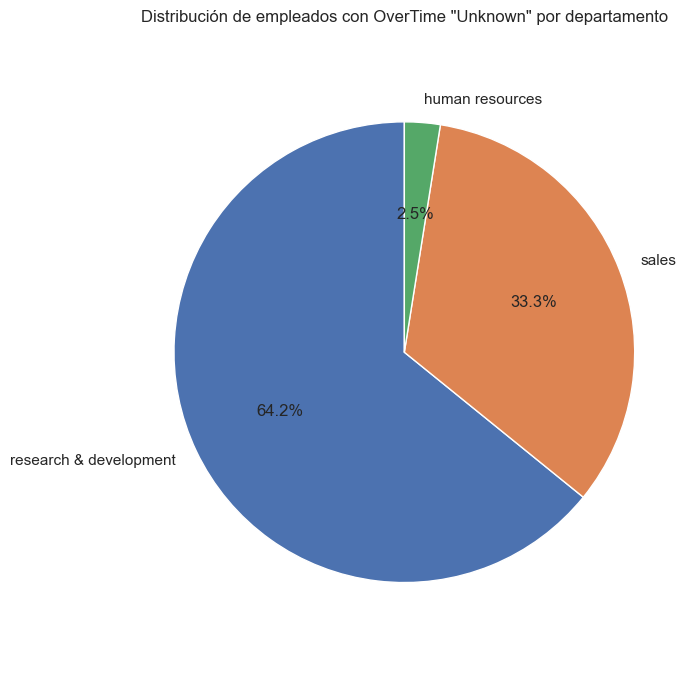

In [77]:
# Filtrar empleados con OverTime = 'Unknown'
df_unknown = df[df['overtime'] == 'Unknown']

# Contar por departamento
departamentos_unknown = df_unknown['department'].value_counts()
porcentajes_departamento_unknown = (departamentos_unknown / departamentos_unknown.sum()) * 100

# Crear gráfico de tarta
plt.figure(figsize=(7, 7))
plt.pie(porcentajes_departamento_unknown,
        labels=porcentajes_departamento_unknown.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de empleados con OverTime "Unknown" por departamento')
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()


# Basado en el %

In [71]:
# 1. Filtrar los datos válidos (sin 'Unknown')
df_validos = df[df['overtime'] != 'Unknown']

# 2. Calcular la proporción de 'Yes' y 'No'
proporciones = df_validos['overtime'].value_counts(normalize=True)

# 3. Contar cuántos empleados tienen 'Unknown'
n_unknown = (df['overtime'] == 'Unknown').sum()

# 4. Estimar cuántos de esos Unknown serían 'Yes' y cuántos 'No'
estimacion = proporciones * n_unknown

estimacion_percentual = (estimacion / n_unknown) * 100

# 5. Mostrar los resultados
print(' Proporciones en los datos conocidos:\n')
print(proporciones.round(2))

print(f'\nTotal de empleados con "Unknown": {n_unknown}')

print('\nEstimación de cómo se podrían repartir esos "Unknown":')
print(estimacion_percentual.round(0))


 Proporciones en los datos conocidos:

overtime
No     0.73
Yes    0.27
Name: proportion, dtype: float64

Total de empleados con "Unknown": 676

Estimación de cómo se podrían repartir esos "Unknown":
overtime
No     73.0
Yes    27.0
Name: proportion, dtype: float64


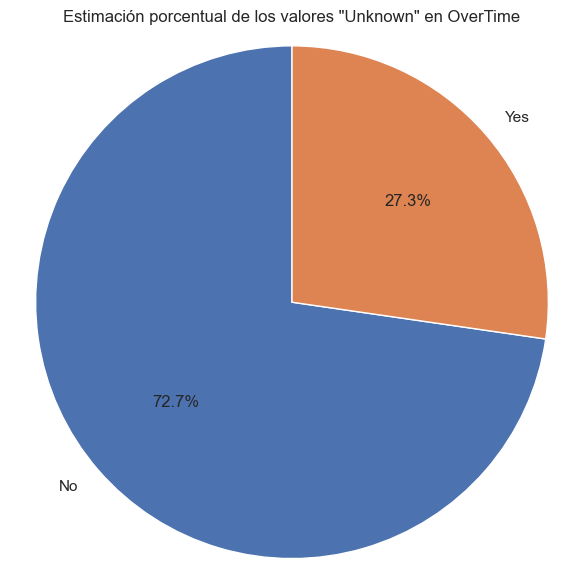

In [72]:
# Gráfico de tarta da estimativa percentual
plt.figure(figsize=(6, 6))
plt.pie(estimacion_percentual,
        labels=estimacion_percentual.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title('Estimación porcentual de los valores "Unknown" en OverTime')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()


# Trabajo Remoto

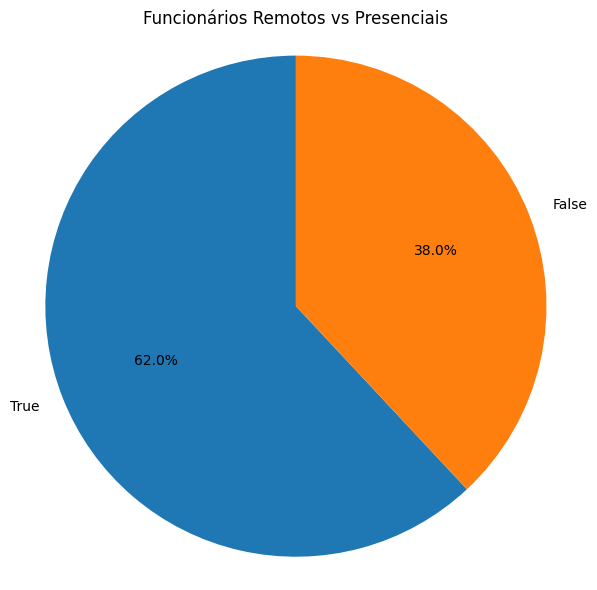

In [12]:
# Contagem de trabalho remoto
remote_counts = df['remotework'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Funcionários Remotos vs Presenciais')
plt.axis('equal')
plt.tight_layout()
plt.show()


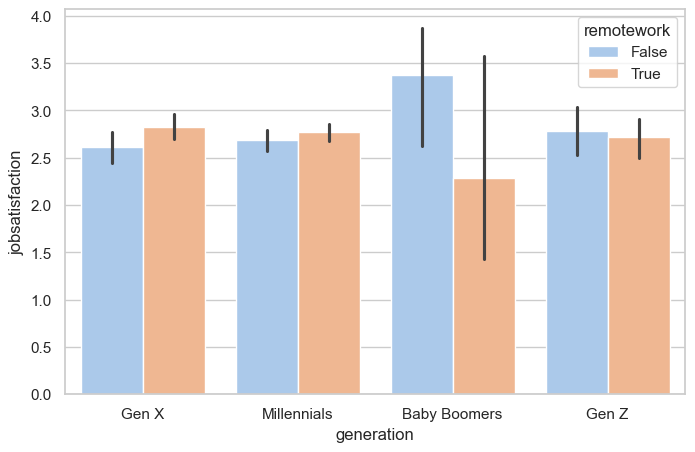

In [39]:
# gen y trabajo remoto
# los baby boomers tiene mas satisfaccion cuando trabajan presencial?

plt.figure(figsize=(8,5))
sns.barplot(data=df,
    x='generation',
    y='jobsatisfaction', hue='remotework',
    palette='pastel');